This file denoises images (remove distortion etc) and clean image

In [87]:
import skimage
from skimage import data
import skimage.transform
import skimage.io
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [103]:
#tag the image for easy changes
#ensure image is loaded into same folder as .ipynb file
image = skimage.img_as_float(skimage.io.imread("TullyZelda2.jpg")).astype(np.float32)

In [ ]:
#tag the image for easy changes
#ensure image is loaded into same folder as .ipynb file
image = skimage.img_as_float(imread("TullyZelda2.jpg")).astype(np.float32)

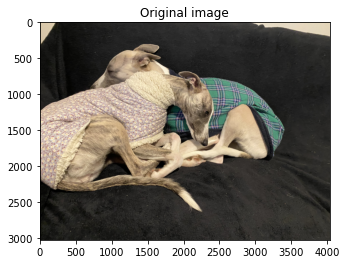

In [104]:
plt.title("Original image")
plt.imshow(image)

In [105]:
#determine shape of image
image.shape

(3024, 4032, 3)

# Crop image

In [109]:
#this crops the image of the fire to remove the background
#note it is specific to this image
def crop(image, crop_x, crop_y):
    
    y, x, c = image.shape
    
    # pixel positions to Start the crop
    startx = x//6 - (crop_x // 8)
    starty = y//4 - (crop_y // 4) 
    
    
    # pixel positions where to stop  the crop
    stopx = startx + crop_x
    stopy = starty + crop_y
    
    return image[starty:stopy, startx:stopx]

In [114]:
image_croped = crop(image,3000,2500)

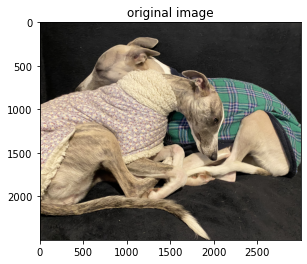

In [115]:
plt.title("original image")
plt.imshow(image_croped)

# Create noise on the image (to later treat for removal)

In [84]:
from skimage.util import random_noise

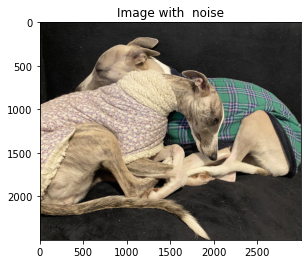

In [117]:
sigma = 0.155
image_noise = random_noise(image_croped, var=sigma**4)

plt.title("Image with  noise")
plt.imshow(image_noise)

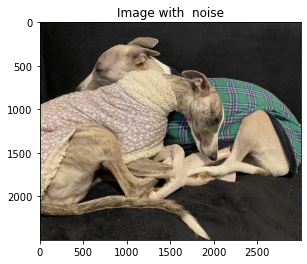

In [126]:
sigma = 0.155
image_noise = random_noise(image_croped, mode='pepper')

plt.title("Image with  noise")
plt.imshow(image_noise)

# Denoising altered image

In [88]:
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma

Estimate the noise level for the image

In [122]:
sigma_est = estimate_sigma(image_noise, channel_axis = -1, average_sigmas=True)

In [123]:
sigma_est

0.02471484384106849

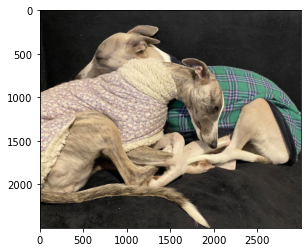

In [124]:
plt.imshow(denoise_tv_chambolle(image_noise, weight = 0.1, channel_axis = -1))

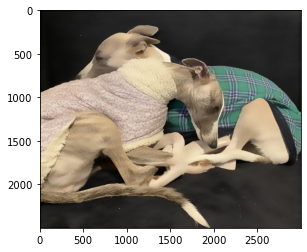

In [125]:
# bilateralfilter 
plt.imshow(denoise_bilateral(image_noise, sigma_color = 0.05, sigma_spatial=15, channel_axis = -1))

In [98]:
# wavelet filter 
plt.imshow(denoise_wavelet(image_noise, rescale_sigma:False, channel_axis = -1))

SyntaxError: invalid syntax (3018593750.py, line 2)

# Adjust image using filters

In [140]:
from skimage.filters import sobel_h
from skimage.io import imread, imshow
from skimage.color import rgb2hsv

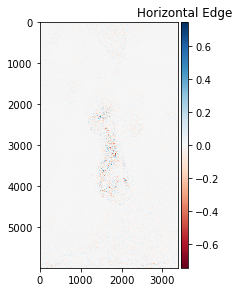

In [136]:
image = skimage.io.imread('whippet.jpg', as_gray=True)
image_sobelh = sobel_h(image)

# plotting images
plt.subplot(121), skimage.io.imshow(image)
plt.title('Original Image')

plt.subplot(122), skimage.io.imshow(image_sobelh)
plt.title('Horizontal Edge')

plt.show()

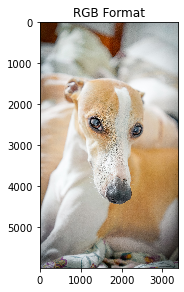

In [141]:

img = imread('whippet.jpg')
img_new = rgb2hsv(img)

plt.subplot(121), imshow(img)
plt.title('RGB Format') 



plt.show()

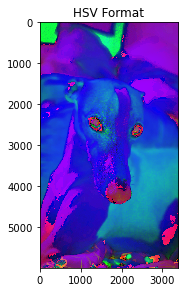

In [142]:
img = imread('whippet.jpg')
img_new = rgb2hsv(img)

plt.subplot(122), imshow(img_new)
plt.title('HSV Format') 

plt.show()

In [ ]:
img = imread('whippet.jpg')
img_new = rgb2hsv(img)

plt.subplot(120), imshow(img_new)
plt.title('HSV Format') 

plt.show()